Calculate the Fresnel Diffraction pattern from a rectangular aperture. 

Step 1: Given $\lambda, z$ and the largest width $l$ of the aperture, calculate the Fresnel number $N_F$.

In [1]:
import numpy as np
lam = 800e-9 #wavelength [m]
z = 1 # propagation distance [m]
l = 1e-3 # width of the aperture

Nf = np.power((l/2),2)/(lam*z)
print('Nf equals {0}'.format(Nf))

Nf equals 0.3125


Step 2: Choose an acceptable level of aliasing at the edge of the diffraction pattern.  
Step 3: Choose M, Q, and N = QM from Figure 5.5 of Goodman.

In [29]:
aliasLvl = 1e-4
M = 100 #how many points to sample the aperture with. 
Q = 100 #scale factor between aperture and surrounding

N = Q*M #total number of sampling points. 
deltax = l/M 
print(deltax)

1e-05


Step 4: Create the padded aperture array of size NxN, centered at index (N/2, N/2)

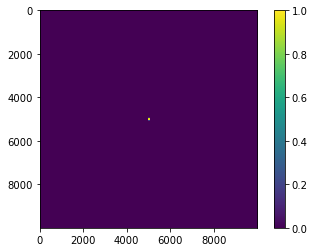

In [22]:
import matplotlib.pyplot as plt
aperture = np.zeros((N,N))
center = int(N/2)
edge = int(M/2)
aperture[center-edge:center+edge+1,center-edge:center+edge+1] = 1

plt.imshow(aperture)
plt.colorbar()

Step 5: Create the quadratic-phase exponential transfer function array of length NxN centered at N/2, N/2.
NOTE: This step takes a long time. 

In [23]:
xvec = np.arange(-deltax*N/2,deltax*N/2,deltax)
xvec[center]

delfx = 1/(-deltax*N/2)
fxvec = np.arange(-delfx*N/2,delfx*N/2,delfx)
fyvec = fxvec
def coolfun(k1, k2):
    return np.exp(1j*2.0*np.pi/lam*z)*np.exp(-1j* np.pi*lam*z*(np.power(k1,2)+np.power(k2,2)))
H2 = [[coolfun(k1, k2) for k1 in fyvec] for k2 in fxvec]

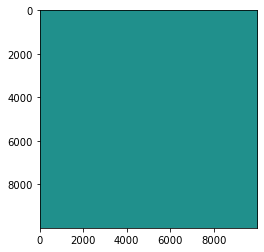

In [24]:
H = np.array(H2)
plt.imshow(abs(H))

Step 6: Perform DFT on the aperture array and center

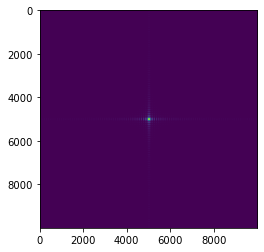

In [25]:
apertureFFT = np.fft.fft2(aperture)
apertureFFT.shape
apertureFFT2 = np.fft.fftshift(apertureFFT)
plt.imshow(abs(apertureFFT2))

Step 7: Multiply the spectral arrays and perform inverse FFT

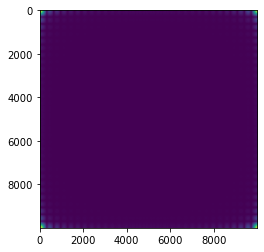

In [30]:
yfft = apertureFFT2*H
y = np.fft.fft2(yfft)
ycen = np.fft.fftshift(y)

plt.imshow(abs(ycen))

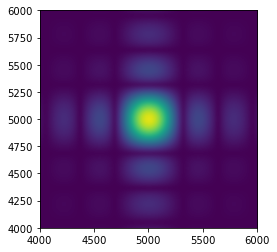

In [28]:
plt.imshow(abs(y))
plt.xlim(4e3, 6e3)
plt.ylim(4e3,6e3)
plt.show()